In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in csv file
game_info_df=pd.read_csv("../data/boardgames_07022021.csv")
# remove duplicate games
game_info_df.drop_duplicates(subset=['objectid'], inplace=True)
# choose the attributes which have higher feature importances
game_info_df=game_info_df[['average', 'yearpublished','maxplaytime', 'minage', 'siteviews', 'numplays',       
       'usersrated', 'stddev', 'avgweight', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments']].copy()
# drop the null rows
game_info_df.dropna(inplace=True)
# remove the rows which have invalid values
game_info_df.drop(game_info_df[game_info_df['average'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplaytime'] ==0].index, inplace = True)
game_info_df.head()

,average,yearpublished,maxplaytime,minage,siteviews,numplays,usersrated,stddev,avgweight,numgeeklists,numtrading,numwanting,numcomments
0,8.77503,2017,120,14,10583753,368134,44354,1.62720,3.8660,4649,535,1374,8021
1,8.60721,2015,60,13,3385064,238259,43007,1.56641,2.8413,3978,310,850,6552
2,8.66981,2018,120,14,1816252,54092,21618,1.24895,3.9065,1630,102,1477,3303
3,8.42870,2016,120,12,6059031,393651,68412,1.38204,3.2395,7276,453,2085,10034
4,8.68957,2017,480,14,2267902,21263,14385,1.59635,4.2333,1010,98,979,2206


In [3]:
# Get the general idea about the dataset value range
game_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
average,27209.0,6.159624,1.137628,1.0,5.52174,6.2608,6.92391,10.0
yearpublished,27209.0,1971.679334,248.818794,-3500.0,1992.00000,2005.0000,2015.00000,2022.0
maxplaytime,27209.0,87.240803,474.346329,1.0,30.00000,45.0000,90.00000,60000.0
minage,27209.0,9.132383,3.971067,0.0,8.00000,10.0000,12.00000,25.0
siteviews,27209.0,71271.386380,227959.963477,1301.0,9363.00000,20383.0000,51272.00000,10583753.0
numplays,27209.0,2166.009041,14580.463972,0.0,19.00000,114.0000,519.00000,699142.0
usersrated,27209.0,663.917821,3161.898790,1.0,30.00000,76.0000,262.00000,104891.0
stddev,27209.0,1.465158,0.449737,0.0,1.27877,1.4634,1.67793,4.5
avgweight,27209.0,1.771392,1.002864,0.0,1.00000,1.7500,2.44440,5.0
numgeeklists,27209.0,191.591642,592.168247,0.0,14.00000,39.0000,125.00000,15950.0


## Select features, Create Train Test Split, Scale the data

In [4]:
# Set features (X) and target (y)
y=game_info_df['average']
X=game_info_df.drop(['average'],axis=1)
X.shape, y.shape

((27209, 12), (27209,))

In [5]:
feature_names=X.columns
feature_names

Index(['yearpublished', 'maxplaytime', 'minage', 'siteviews', 'numplays',
       'usersrated', 'stddev', 'avgweight', 'numgeeklists', 'numtrading',
       'numwanting', 'numcomments'],
      dtype='object')

In [6]:
# Create a Train Test Split (20/80)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.2,random_state=101)
X_train.shape, y_train.shape

((5441, 12), (5441,))

In [7]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## RandomeForestRegressor

Training Data Score: 0.94288
Testing Data Score: 0.55989


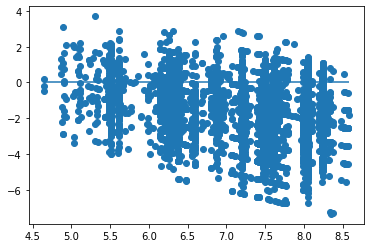

In [22]:
from sklearn.ensemble import RandomForestRegressor
 # Create a random forest regressor
rf = RandomForestRegressor(n_estimators=500)
rf = rf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {rf.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test):.5f}")
predictions = rf.predict(X)
# Plot Residuals
plt.scatter(predictions, -predictions + y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

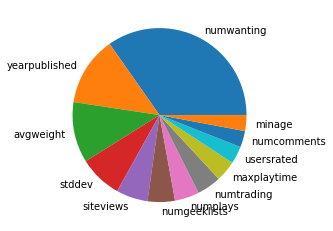

[(0.3473562979131199, 'numwanting'),
 (0.12866733334442088, 'yearpublished'),
 (0.1129521967017061, 'avgweight'),
 (0.08020729763552494, 'stddev'),
 (0.05872291001161003, 'siteviews'),
 (0.050739414197214304, 'numgeeklists'),
 (0.04537383433833869, 'numplays'),
 (0.04494114061994131, 'numtrading'),
 (0.03868378563678005, 'maxplaytime'),
 (0.03248208696860571, 'usersrated'),
 (0.03032918019827193, 'numcomments'),
 (0.029544522434466314, 'minage')]

In [23]:
importances = rf.feature_importances_
rf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
plt.pie([a[0] for a in rf_feature_importance],labels=[a[1] for a in rf_feature_importance],normalize=True)
plt.show()
rf_feature_importance

## DecisionTreeRegressor

In [11]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(X_train_scaled, y_train)
dtr.score(X_train_scaled, y_train)
print(f"Training Data Score: {dtr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {dtr.score(X_test_scaled, y_test):.5f}")
predictions = dtr.predict(X)
# Plot Residuals
plt.scatter(predictions, -predictions + y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Training Data Score: 1.00000
Testing Data Score: 0.13333


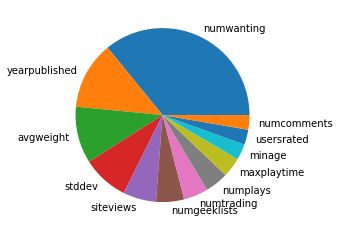

[(0.35890289172199624, 'numwanting'),
 (0.12566091011503144, 'yearpublished'),
 (0.10551098701081714, 'avgweight'),
 (0.08648162800700793, 'stddev'),
 (0.06136210942763745, 'siteviews'),
 (0.0521128933083946, 'numgeeklists'),
 (0.04552262588744967, 'numtrading'),
 (0.0433249647367509, 'numplays'),
 (0.03680120118429564, 'maxplaytime'),
 (0.02927629417394763, 'minage'),
 (0.02795607657366424, 'usersrated'),
 (0.02708741785300711, 'numcomments')]

In [24]:
importances = dtr.feature_importances_
dtr_feature_importance=sorted(zip(importances, feature_names), reverse=True)
plt.pie([a[0] for a in dtr_feature_importance],labels=[a[1] for a in dtr_feature_importance])
plt.show()
dtr_feature_importance

k: 1, Train/Test Score: 1.000/-0.107
k: 3, Train/Test Score: 0.633/0.249
k: 5, Train/Test Score: 0.552/0.296
k: 7, Train/Test Score: 0.508/0.323
k: 9, Train/Test Score: 0.494/0.332
k: 11, Train/Test Score: 0.471/0.343
k: 13, Train/Test Score: 0.461/0.348
k: 15, Train/Test Score: 0.453/0.351
k: 17, Train/Test Score: 0.445/0.355
k: 19, Train/Test Score: 0.439/0.355
k: 21, Train/Test Score: 0.432/0.356
k: 23, Train/Test Score: 0.427/0.357
k: 25, Train/Test Score: 0.422/0.359
k: 27, Train/Test Score: 0.419/0.360
k: 29, Train/Test Score: 0.416/0.361


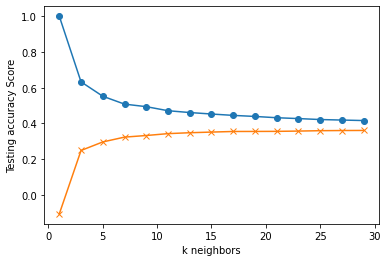

In [14]:
from sklearn.neighbors import KNeighborsRegressor
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train_scaled, y_train)
    train_score = knr.score(X_train_scaled, y_train)
    test_score = knr.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

## DummyRegressor

In [15]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr = dummy_regr.fit(X_train_scaled, y_train)
print(f"Training Data Score: {dummy_regr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {dummy_regr.score(X_test_scaled, y_test):.5f}")

Training Data Score: 0.00000
Testing Data Score: -0.00001


## GaussianProcessRegressor

Training Data Score: 0.32680
Testing Data Score: 0.30690


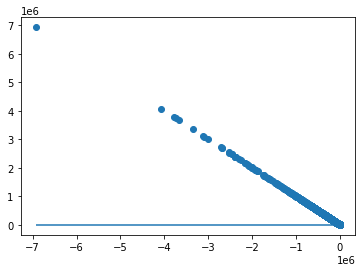

In [25]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_train_scaled, y_train)
print(f"Training Data Score: {gpr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {gpr.score(X_test_scaled, y_test):.5f}")
predictions = gpr.predict(X)
# Plot Residuals
plt.scatter(predictions, -predictions + y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()